In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, manifold, decomposition, ensemble, discriminant_analysis
from sklearn.pipeline import Pipeline

In [108]:
digits = datasets.load_digits()

In [109]:
data = digits.data
labels = digits.target

In [110]:
n_samples, n_features = data.shape

In [111]:
methods = [ 'pca', 'isomap', 'lle', 'mlle', 'hlle', 'ltsa', 'mds', 'trees','tsne']

In [112]:
from matplotlib import offsetbox
def plot_embedding(X, y, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure(figsize=(20,15))
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(digits.target[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(digits.data.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

In [95]:
def embed(method='tsne'):
    X = data.copy()
    if method in "tsne":
        return manifold.TSNE(n_components=2, init='pca', random_state=0)
    elif method in "pca":    
        return decomposition.TruncatedSVD(n_components=2)
    elif method in "isomap":
        return manifold.Isomap(n_neighbors=30, n_components=2)
    elif method in "lle":
        return manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=2, method='standard')
    elif method in "mlle":
        return manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=2, method='modified')
    elif method in "hlle":
        return manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=2, method='hessian')
    elif method in "ltsa":
        return manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=2, method='ltsa')
    elif method in "mds":
        return manifold.MDS(n_components=2, n_init=1, max_iter=100)
    elif method in "trees":
        trees = ensemble.RandomTreesEmbedding(n_estimators=200, random_state=0, max_depth=5)
        pca = decomposition.TruncatedSVD(n_components=2)
        return Pipeline([('Random Tree Embedder',trees),('PCA',pca)])
    elif method in "spectral":
        return manifold.SpectralEmbedding(n_components=2, random_state=0, eigen_solver="arpack")
    else:
        print('Please use valid method')



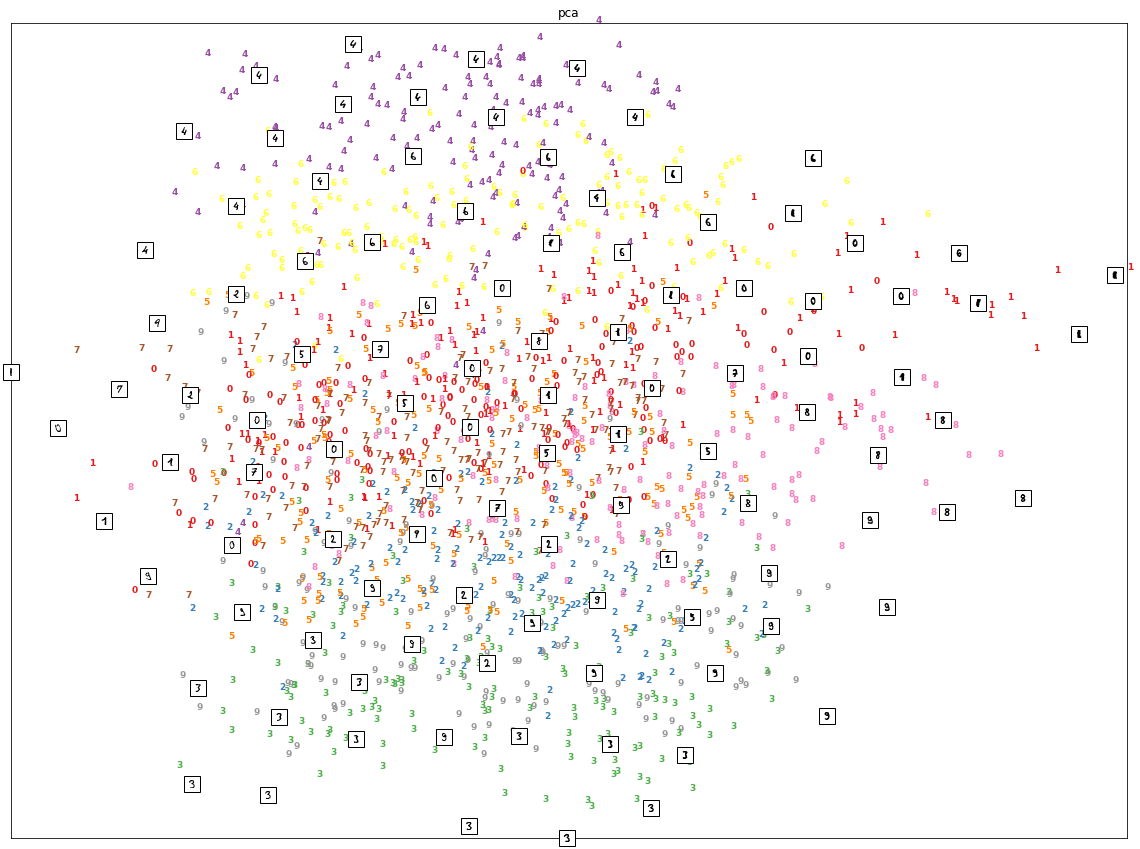

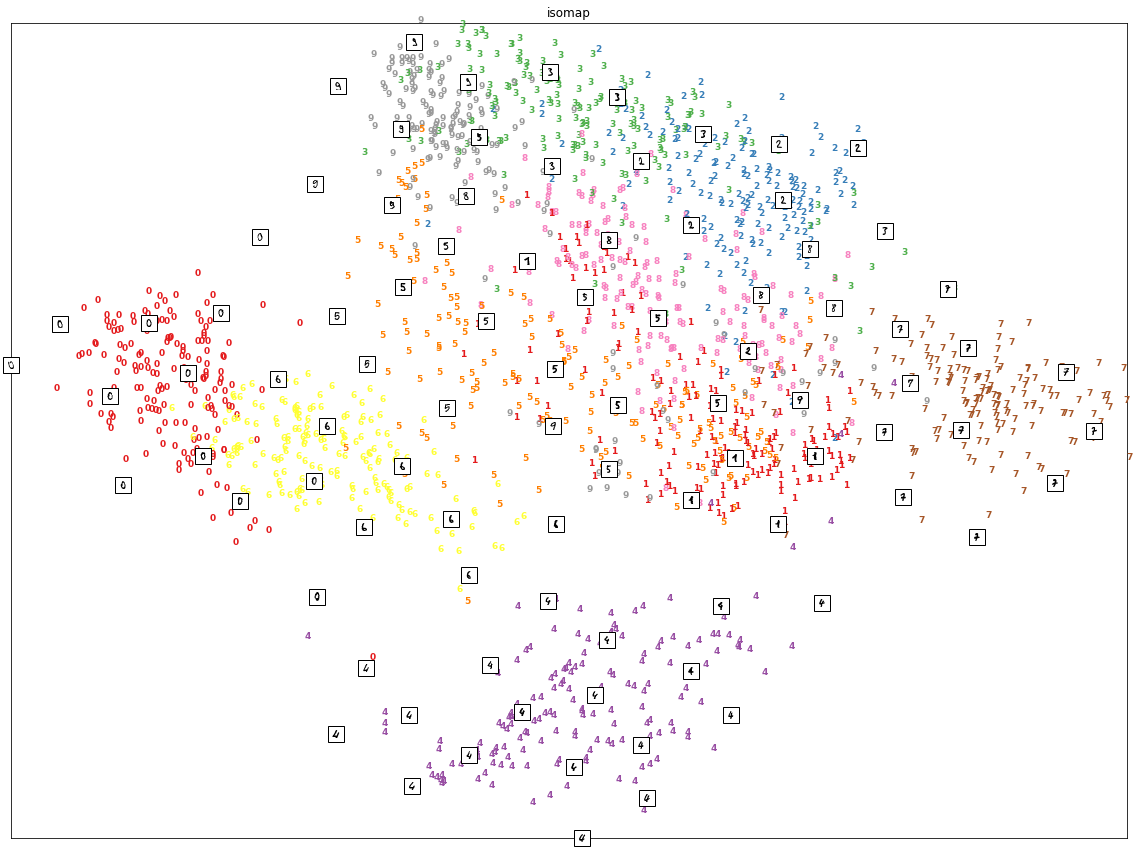

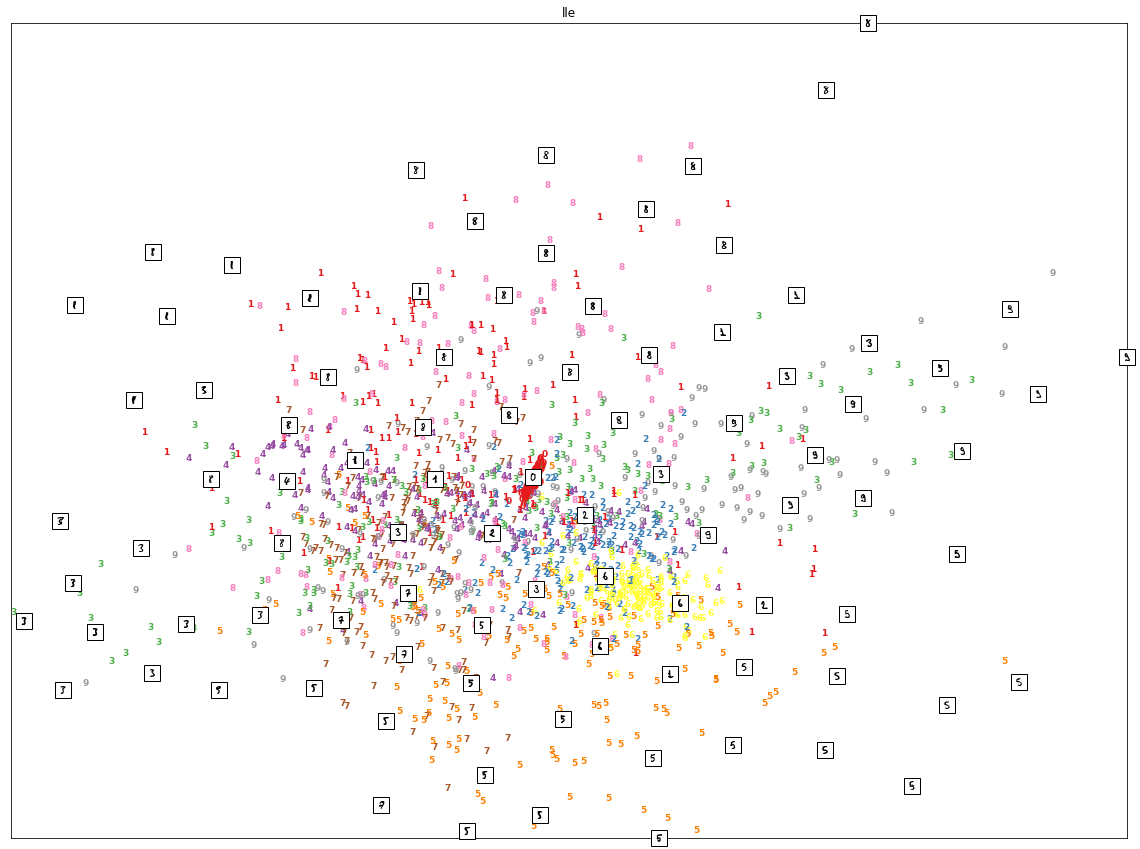

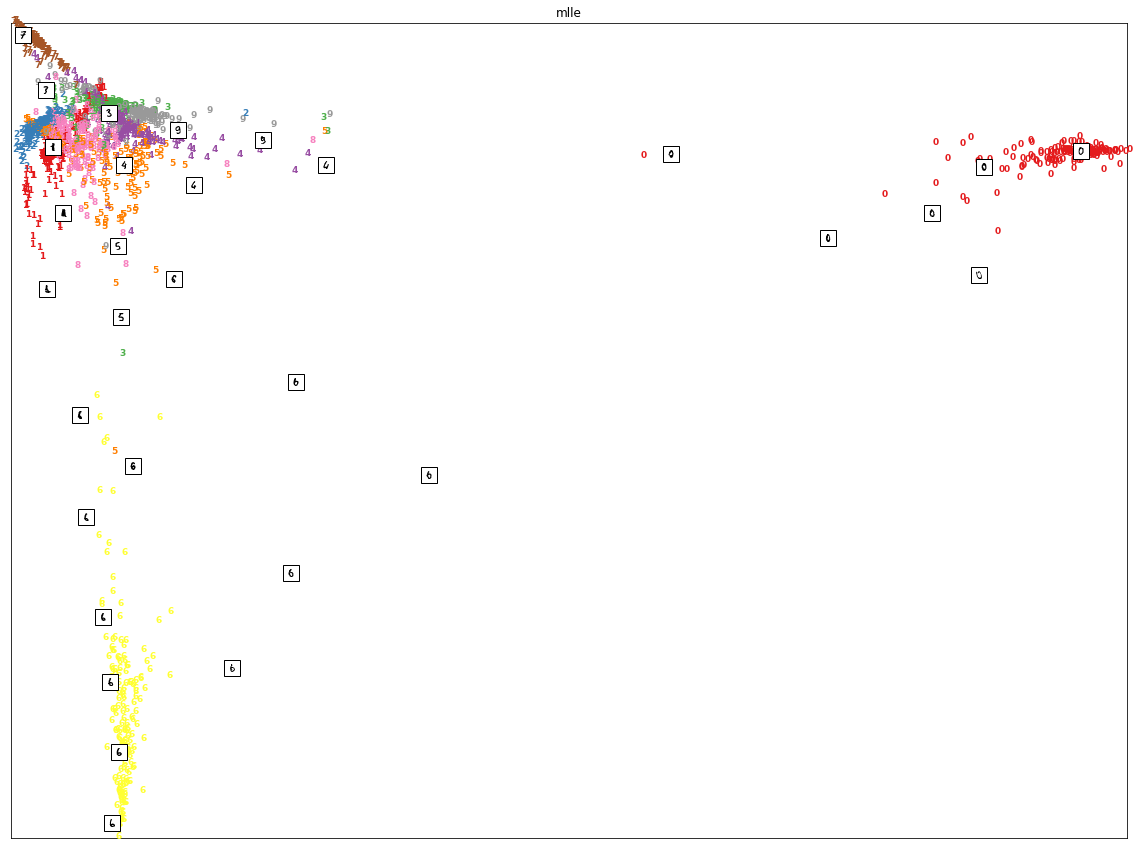

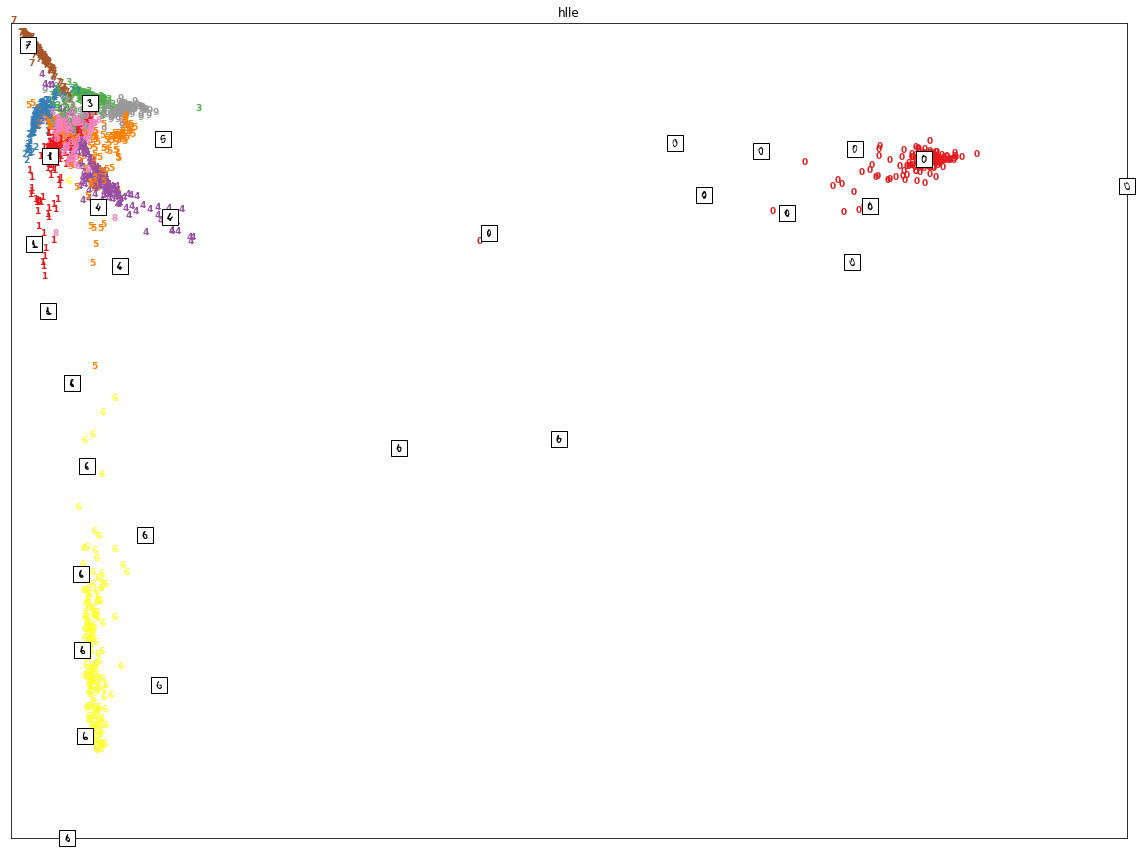

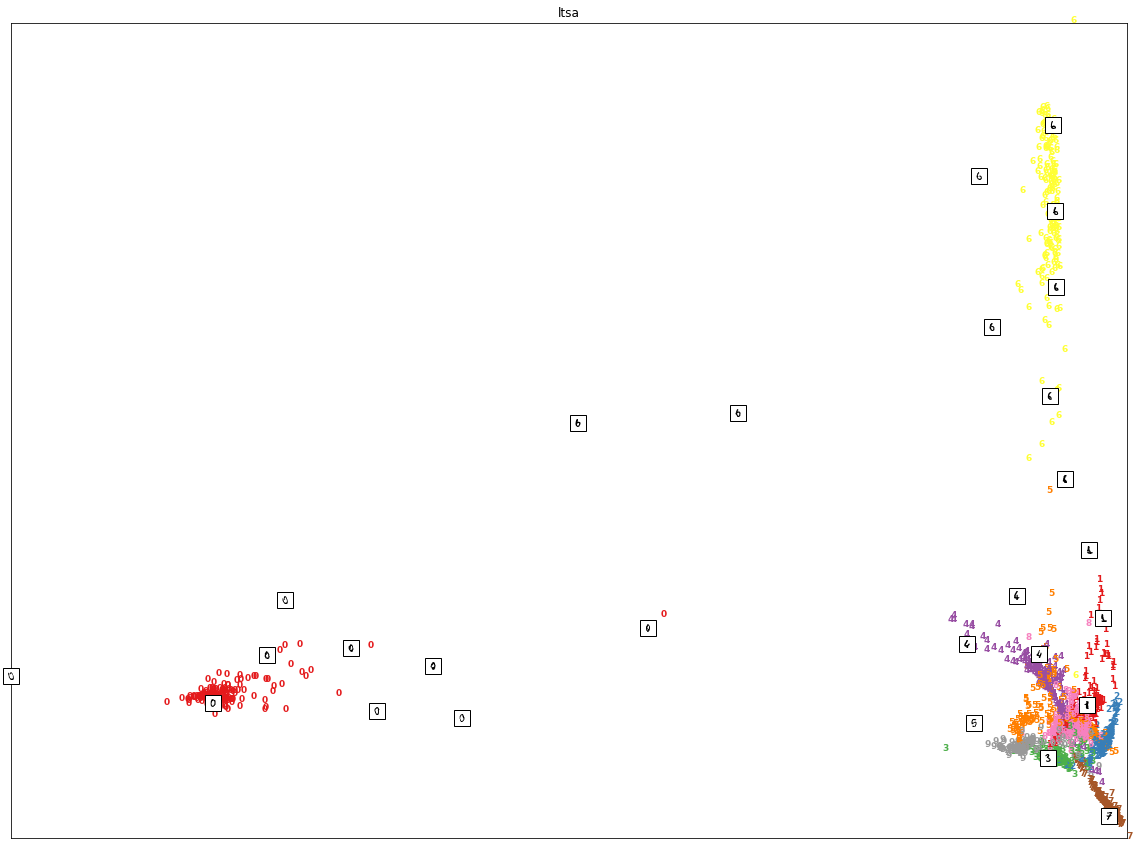

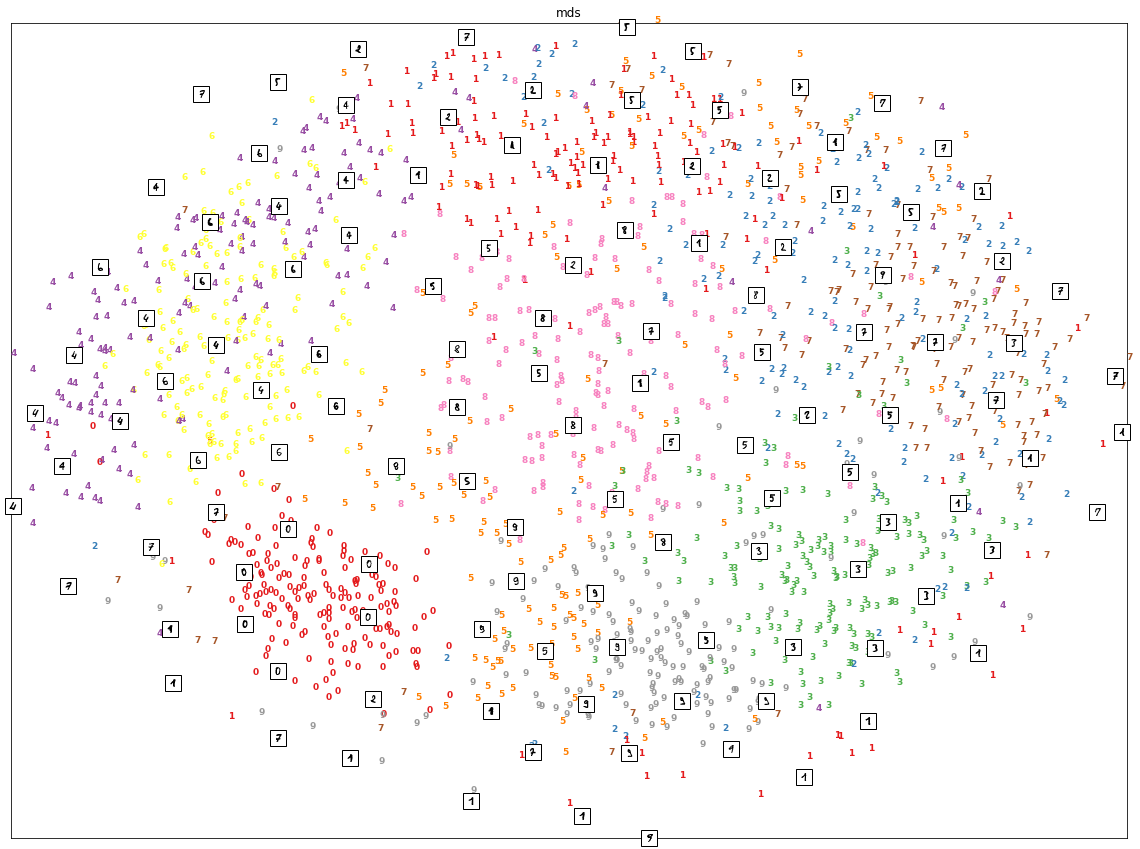

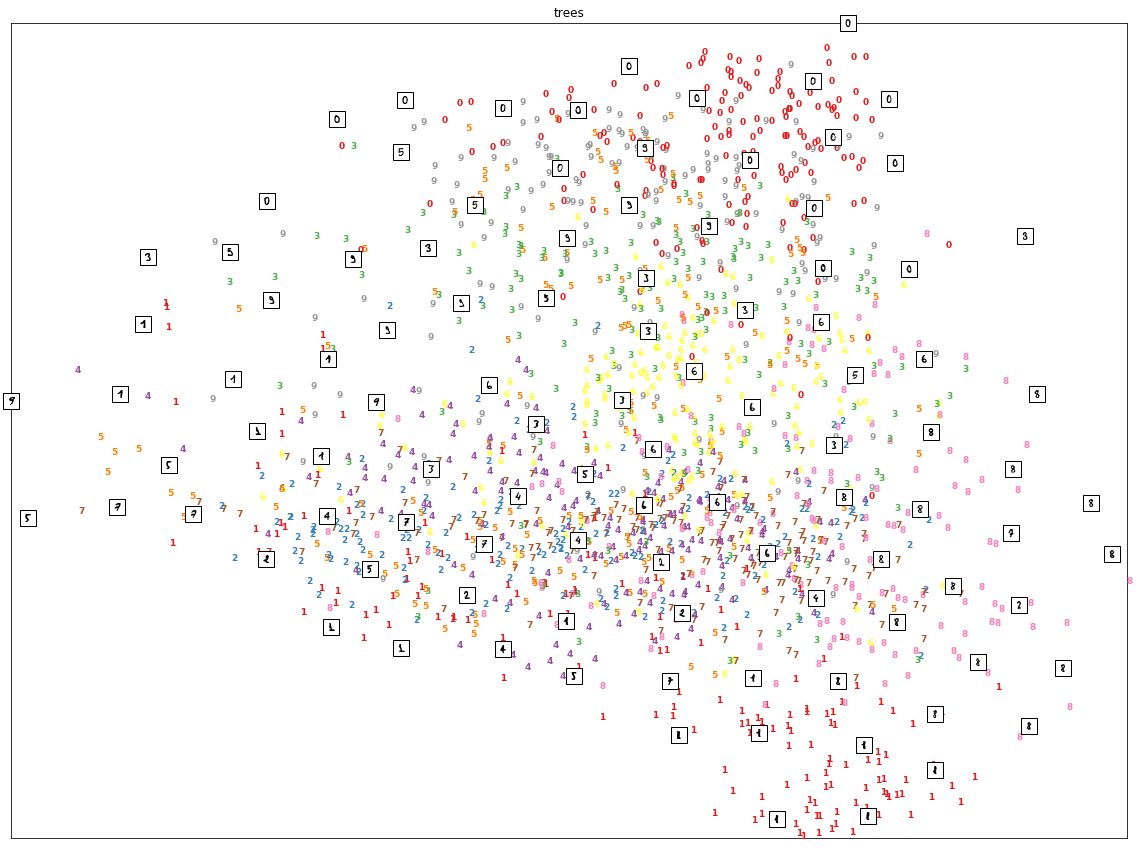

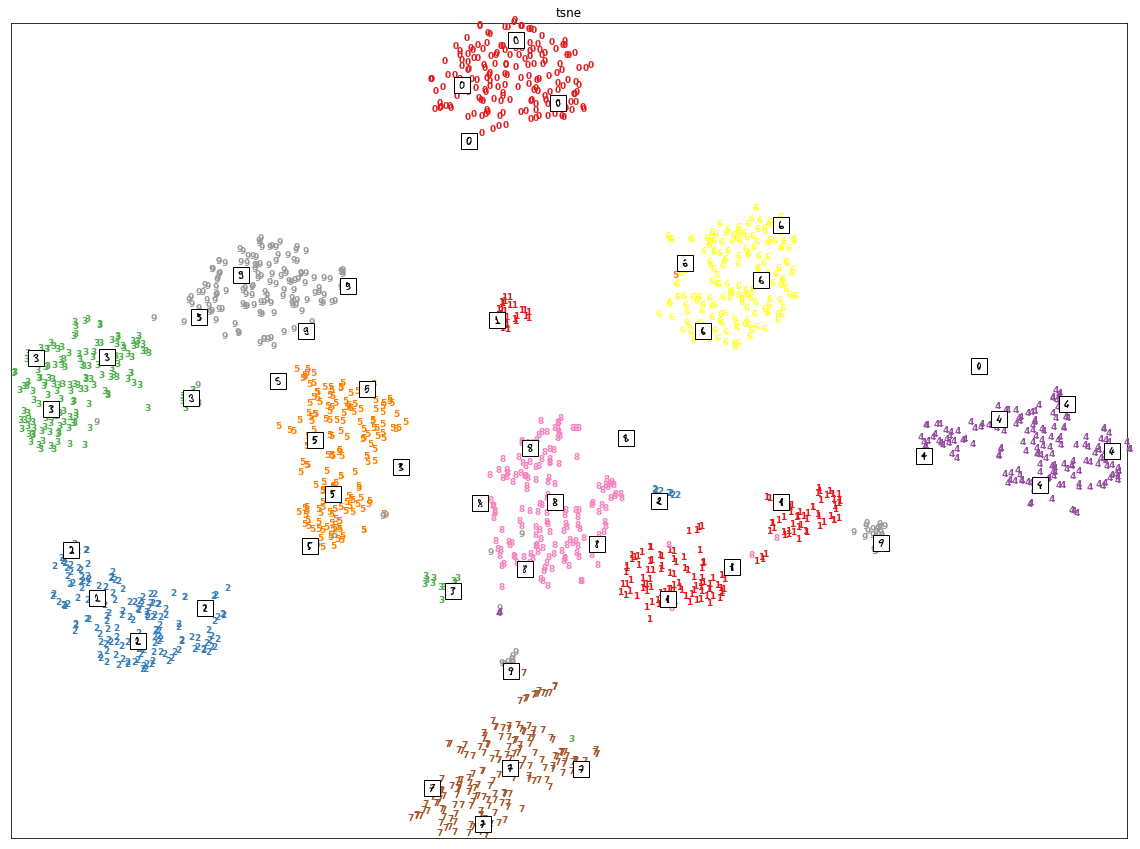

In [113]:
for mathod in methods:
    clf = embed(mathod)
    clusters = clf.fit_transform(data)
    plot_embedding(clusters,labels,mathod)
    
plt.show()